## Autograd mechanics
### requires_grad 

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
print(torch.__version__)

0.4.1


In [13]:
x = torch.randn(5, 5)
y = torch.randn(5, 5)
z = torch.randn((5, 5), requires_grad=True)
a = x + y
a.requires_grad

False

In [14]:
b = a + z
b.requires_grad

True

### finetune a pretrained neural network

In [15]:
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad=False
# Replace the last fully-connected layer
# Parameters of newly constructed modules have requires_grad=True by default
model.fc = nn.Linear(512, 100)

In [16]:
optimizer = optim.SGD(model.fc.parameters(), lr=1e-2, momentum=0.9)

## Broadcasting semantics
### General semantics

In [17]:
x = torch.empty(5,1,4,1)
y = torch.empty(3,1,1)
(x+y).size()

torch.Size([5, 3, 4, 1])

### In-place semantics
In-place operations do not allow the in-place tensor to change shape as a result of the broadcast

In [18]:
x = torch.empty(5,3,4,1)
y = torch.empty(3,1,1)
(x.add_(y)).size()

torch.Size([5, 3, 4, 1])

In [19]:
x = torch.empty(1,3,1)
y = torch.empty(3,1,7)
(x.add_(y)).size()

RuntimeError: The expanded size of the tensor (1) must match the existing size (7) at non-singleton dimension 2

### Backwards compatibility

In [20]:
torch.utils.backcompat.broadcast_warning.enabled = True

In [21]:
torch.add(torch.ones(4,1), torch.ones(4))

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

## Deep Learning with PyTorch: A 60  Minute Blitz

In [22]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


In [23]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1244, 0.1995, 0.6880],
        [0.6172, 0.2977, 0.1032],
        [0.5361, 0.6455, 0.8241],
        [0.3803, 0.4417, 0.7913],
        [0.1498, 0.9740, 0.2327]])


In [24]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [25]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [26]:
print(x.size())

torch.Size([2])


In [27]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [29]:
x = torch.randn_like(x, dtype=torch.float)
y = torch.rand(5, 3)
print(x + y)

tensor([[ 2.0926, -0.1763,  1.0845],
        [ 1.1500,  0.7960,  2.1267],
        [ 0.2026, -0.0383, -0.2687],
        [ 1.9072,  0.2013,  0.2008],
        [ 0.3873,  1.3045, -0.3134]])


In [30]:
print(torch.add(x ,y))

tensor([[ 2.0926, -0.1763,  1.0845],
        [ 1.1500,  0.7960,  2.1267],
        [ 0.2026, -0.0383, -0.2687],
        [ 1.9072,  0.2013,  0.2008],
        [ 0.3873,  1.3045, -0.3134]])


In [34]:
print(x)
print(x[1, :])

tensor([[ 2.0892, -0.8723,  0.7187],
        [ 0.2737,  0.5376,  1.3863],
        [ 0.0436, -0.4258, -0.5272],
        [ 1.5510, -0.5358, -0.4586],
        [-0.1731,  1.0407, -0.4177]])
tensor([0.2737, 0.5376, 1.3863])


### resize or reshape tensor

In [35]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [41]:
x = torch.rand(1)
print(x)
print(x.item())

tensor([0.3757])
0.3757442235946655


### Numpy Bridge

In [42]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [43]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [44]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [45]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [47]:
print(torch.cuda.is_available())

False


### Autograd: Automatic Differentiation

In [48]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [49]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [50]:
print(y.grad_fn)

In [51]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


In [52]:
out.backward()

In [54]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [57]:
print(x.requires_grad)
print((x ** 2).requires_grad)

True
True


In [58]:
with torch.no_grad():
    print((x ** 2).requires_grad)

False


## Neural Networks 
### 1. Define the network

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [67]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [68]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [69]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [70]:
inputs = torch.randn(1, 1, 32, 32)
out = net(inputs)
print(out)

tensor([[ 0.0106, -0.0013,  0.0777, -0.0315,  0.0651, -0.1438, -0.1099,  0.1237,
         -0.0957,  0.0519]], grad_fn=<ThAddmmBackward>)


In [71]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### 2. Loss function

In [72]:
output = net(inputs)
target = torch.randn(10)
target = target.view(1, -1) # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9352, grad_fn=<MseLossBackward>)


### 3. Backprob

In [73]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])


In [74]:
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
tensor([-0.0023,  0.0082, -0.0058, -0.0083, -0.0073, -0.0024])


### 4. Updating the weights

In [76]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in the training loop:
optimizer.zero_grad() # zero the buffer gradients, since gradients are accumulated
output = net(inputs)
loss = criterion(output, target)
loss.backward()
optimizer.step()

## Training a Classifier
### 1. Loading and normalizing CIFAR10

In [77]:
import torch
import torchvision
import torchvision.transforms as transforms

In [78]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
trainset= torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


horse  frog  ship  bird


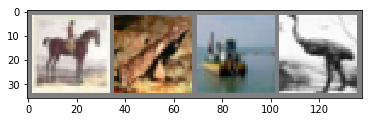

Process Process-10:
Process Process-9:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-p

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2. Define a Convolution Neural Network

In [111]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

net = Net()

### 3. Define a Loss function and optimizer

In [112]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network

In [113]:
import time
t0 = time.time()

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
#         print(outputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('%.3f seconds, [%d, %5d] loss: %.3f' % 
                 (time.time() - t0, epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

5.121 seconds, [1,  2000] loss: 2.226
10.275 seconds, [1,  4000] loss: 1.862
15.332 seconds, [1,  6000] loss: 1.654
20.345 seconds, [1,  8000] loss: 1.557
25.360 seconds, [1, 10000] loss: 1.499
30.338 seconds, [1, 12000] loss: 1.442
36.660 seconds, [2,  2000] loss: 1.395
41.701 seconds, [2,  4000] loss: 1.365
46.745 seconds, [2,  6000] loss: 1.330
51.798 seconds, [2,  8000] loss: 1.336
56.858 seconds, [2, 10000] loss: 1.320
61.904 seconds, [2, 12000] loss: 1.278
Finished Training


### 5. Test the network on the test data

In [119]:
correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images)
#         print(outputs)
        _, predicted = torch.max(outputs.data, 1)
#         print(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


## Visdom

In [128]:
import visdom
import numpy as np
vis = visdom.Visdom()
vis.text('Hello, world!')
vis.image(np.ones((3, 10, 10)))

'window_36d475cf0bf63c'

'window_36d475d157aa88'

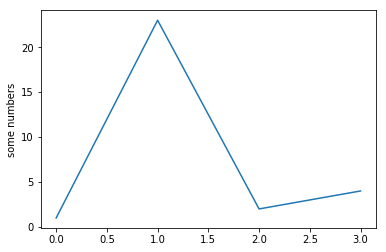

In [129]:
import matplotlib.pyplot as plt
plt.plot([1, 23, 2, 4])
plt.ylabel('some numbers')
vis.matplot(plt)

In [135]:
import math
X = np.arange(100)

In [149]:
import time
t = 0
# line_plot = vis.line(Y=np.array([0]), X=np.array([t]))
for x in X:
    t += 1
    x = math.sin(x)
    time.sleep(.100)
    if t == 1:
        line_plot = vis.line(Y=np.array([x]),
                            opts=dict(
#                             fillarea=True,
#                             showlegend=False,
#                             width=800,
#                             height=800,
                            xlabel='Time',
                            ylabel='Volume',
#                             ytype='log',
                            title='Stacked area plot',
#                             marginleft=30,
#                             marginright=30,
#                             marginbottom=80,
#                             margintop=30,
                            ))
    else:
        vis.line(np.array([x]), np.array([t]), win=line_plot, update='append')
